<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,74.628369,78.312816,63.414926,0.044707,226.400817,226.355040,0.045777
1,0.0,1.0,76.264549,27.685339,46.842077,-0.021135,160.770830,160.802256,-0.031426
2,0.0,2.0,76.483463,87.950641,34.018186,0.057316,208.509606,208.449123,0.060483
3,0.0,3.0,62.750288,48.382980,51.771994,0.068989,172.974251,172.912550,0.061701
4,0.0,4.0,43.087695,90.412500,93.029285,0.039739,236.569220,236.529362,0.039858
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,65.587919,79.874091,82.240349,0.061319,237.763677,237.707345,0.056333
249996,999.0,246.0,54.908528,29.177449,54.765579,-0.024750,148.826805,148.859748,-0.032942
249997,999.0,247.0,77.781534,96.442567,73.714199,0.022676,257.960977,257.939247,0.021730
249998,999.0,248.0,83.610042,93.291891,86.997958,-0.008795,273.891095,273.904807,-0.013711


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,74.628369,78.312816,63.414926,0.044707,226.400817,226.355040,0.045777
1,0.0,1.0,76.264549,27.685339,46.842077,-0.021135,160.770830,160.802256,-0.031426
2,0.0,2.0,76.483463,87.950641,34.018186,0.057316,208.509606,208.449123,0.060483
3,0.0,3.0,62.750288,48.382980,51.771994,0.068989,172.974251,172.912550,0.061701
4,0.0,4.0,43.087695,90.412500,93.029285,0.039739,236.569220,236.529362,0.039858
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,65.587919,79.874091,82.240349,0.061319,237.763677,237.707345,0.056333
249996,999.0,246.0,54.908528,29.177449,54.765579,-0.024750,148.826805,148.859748,-0.032942
249997,999.0,247.0,77.781534,96.442567,73.714199,0.022676,257.960977,257.939247,0.021730
249998,999.0,248.0,83.610042,93.291891,86.997958,-0.008795,273.891095,273.904807,-0.013711


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    74.628369  78.312816  63.414926  0.044707  226.400817   
      1.0    76.264549  27.685339  46.842077 -0.021135  160.770830   
      2.0    76.483463  87.950641  34.018186  0.057316  208.509606   
      3.0    62.750288  48.382980  51.771994  0.068989  172.974251   
      4.0    43.087695  90.412500  93.029285  0.039739  236.569220   
...                ...        ...        ...       ...         ...   
999.0 245.0  65.587919  79.874091  82.240349  0.061319  237.763677   
      246.0  54.908528  29.177449  54.765579 -0.024750  148.826805   
      247.0  77.781534  96.442567  73.714199  0.022676  257.960977   
      248.0  83.610042  93.291891  86.997958 -0.008795  273.891095   
      249.0  34.308218  95.361859  78.136687  0.004893  217.811656   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.355040  0.045777  
      1.0    160.802256 -0.031426  
      2.0    208.449123  0.060483  
      3.0    172.912550  0.061701  
      4.0    236.529362  0.039858  
...                 ...       ...  
999.0 245.0  237.707345  0.056333  
      246.0  148.859748 -0.032942  
      247.0  257.939247  0.021730  
      248.0  273.904807 -0.013711  
      249.0  217.805102  0.006554  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    74.628369  78.312816  63.414926  0.044707  226.400817   
      1.0    76.264549  27.685339  46.842077 -0.021135  160.770830   
      2.0    76.483463  87.950641  34.018186  0.057316  208.509606   
      3.0    62.750288  48.382980  51.771994  0.068989  172.974251   
      4.0    43.087695  90.412500  93.029285  0.039739  236.569220   
...                ...        ...        ...       ...         ...   
999.0 245.0  65.587919  79.874091  82.240349  0.061319  237.763677   
      246.0  54.908528  29.177449  54.765579 -0.024750  148.826805   
      247.0  77.781534  96.442567  73.714199  0.022676  257.960977   
      248.0  83.610042  93.291891  86.997958 -0.008795  273.891095   
      249.0  34.308218  95.361859  78.136687  0.004893  217.811656   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.355040  0.045777  
      1.0    160.802256 -0.031426  
      2.0    208.449123  0.060483  
      3.0    172.912550  0.061701  
      4.0    236.529362  0.039858  
...                 ...       ...  
999.0 245.0  237.707345  0.056333  
      246.0  148.859748 -0.032942  
      247.0  257.939247  0.021730  
      248.0  273.904807 -0.013711  
      249.0  217.805102  0.006554  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,74.628369,78.312816,63.414926,0.044707,226.400817,226.355040,0.045777
1,0.0,1.0,76.264549,27.685339,46.842077,-0.021135,160.770830,160.802256,-0.031426
2,0.0,2.0,76.483463,87.950641,34.018186,0.057316,208.509606,208.449123,0.060483
3,0.0,3.0,62.750288,48.382980,51.771994,0.068989,172.974251,172.912550,0.061701
4,0.0,4.0,43.087695,90.412500,93.029285,0.039739,236.569220,236.529362,0.039858
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,65.587919,79.874091,82.240349,0.061319,237.763677,237.707345,0.056333
249996,999.0,246.0,54.908528,29.177449,54.765579,-0.024750,148.826805,148.859748,-0.032942
249997,999.0,247.0,77.781534,96.442567,73.714199,0.022676,257.960977,257.939247,0.021730
249998,999.0,248.0,83.610042,93.291891,86.997958,-0.008795,273.891095,273.904807,-0.013711


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    74.628369  78.312816  63.414926  0.044707  226.400817   
      1.0    76.264549  27.685339  46.842077 -0.021135  160.770830   
      2.0    76.483463  87.950641  34.018186  0.057316  208.509606   
      3.0    62.750288  48.382980  51.771994  0.068989  172.974251   
      4.0    43.087695  90.412500  93.029285  0.039739  236.569220   
...                ...        ...        ...       ...         ...   
999.0 245.0  65.587919  79.874091  82.240349  0.061319  237.763677   
      246.0  54.908528  29.177449  54.765579 -0.024750  148.826805   
      247.0  77.781534  96.442567  73.714199  0.022676  257.960977   
      248.0  83.610042  93.291891  86.997958 -0.008795  273.891095   
      249.0  34.308218  95.361859  78.136687  0.004893  217.811656   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    226.355040  0.045777  
      1.0    160.802256 -0.031426  
      2.0    208.449123  0.060483  
      3.0    172.912550  0.061701  
      4.0    236.529362  0.039858  
...                 ...       ...  
999.0 245.0  237.707345  0.056333  
      246.0  148.859748 -0.032942  
      247.0  257.939247  0.021730  
      248.0  273.904807 -0.013711  
      249.0  217.805102  0.006554  

[250000 rows x 7 columns]

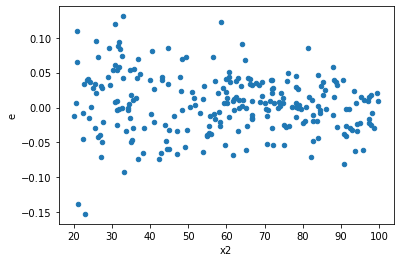

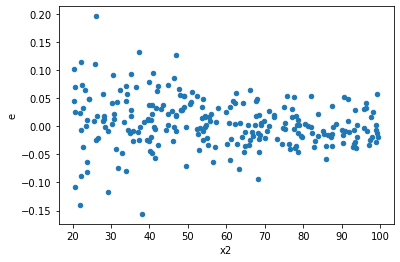

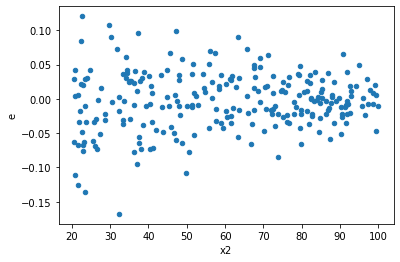

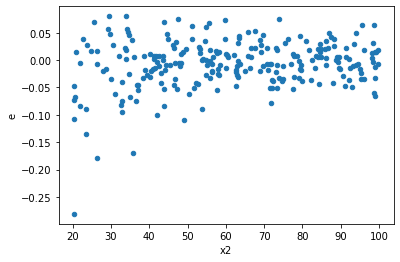

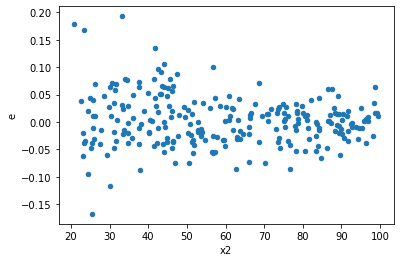

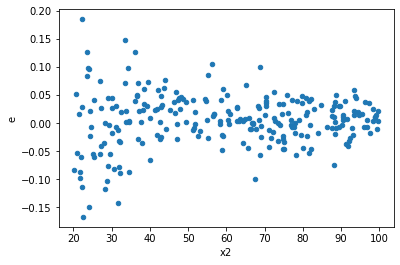

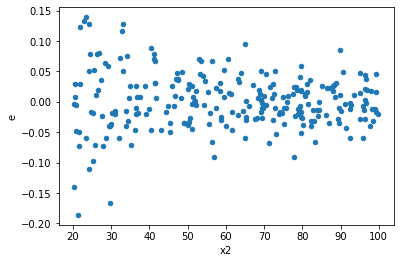

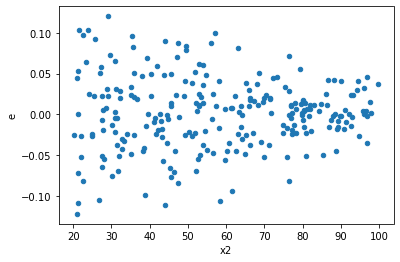

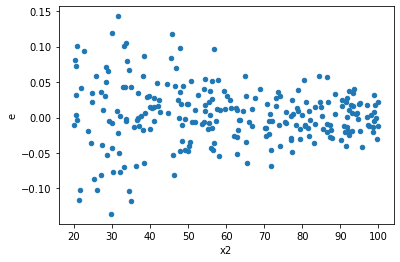

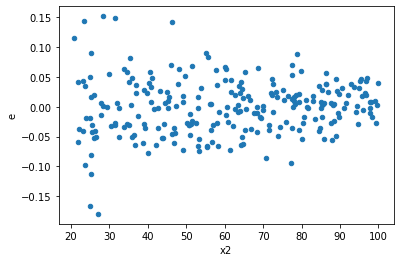

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
61.0,97.0,97.0,0.19566887379959502,0.22175377439558683,0.0020172048845319077,0.0022861213855215135,1.133311446473127,0.5389009522269137,0.7305495238865432,0.26945047611345685,Reject001=1 : Homoscedasticity
400.0,97.0,97.0,0.19509276083402674,0.2071802422316044,0.002011265575608523,0.0021358787858928286,1.0619576110661582,0.7678082334887235,0.6160958832556382,0.38390411674436176,Reject001=1 : Homoscedasticity
487.0,97.0,97.0,0.1749089463506318,0.1752645944182974,0.0018031850139240393,0.0018068514888484267,1.002033332628696,0.992039567472184,0.503980216263908,0.496019783736092,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.235486559793844,0.1322963626598702,0.0024276964927200414,0.0013638800274213421,0.5618000567662487,0.004908871152248807,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.2810338394255581,0.11492128467500602,0.0028972560765521452,0.001184755512113464,0.4089232987383608,1.5437238902874667e-05,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.2672201596034239,0.09846758932242074,0.002754847006220865,0.0010151297868290798,0.3684886255159585,1.5290818726959187e-06,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.2521611307888442,0.11310312350546359,0.00259959928648293,0.0011660115825305524,0.44853512177566485,0.00010136305875614955,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.25282425311063084,0.17348326678542592,0.0026064355990786684,0.0017884872864476898,0.6861812688101292,0.06512144200150602,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,0.34281332842070766,0.11748713468793746,0.003534158024955749,0.001211207574102448,0.34271460572779944,2.719056153589407e-07,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.26756855366830234,0.1713390545295021,0.0027584386976113643,0.0017663820054587846,0.6403557226007456,0.029228987057791873,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,0.22362397577816767,0.14971533031094805,0.0023054018121460586,0.0015434570135149284,0.669495879366101,0.04950565547448729,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,0.23283672108672204,0.0789041761724376,0.002400378567904351,0.000813445115179769,0.3388820105530049,2.062833345048116e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    850
Reject001=1 : Homoscedasticity      150
Name: Result_test, dtype: int64